In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Supress all the warnings.
warnings.filterwarnings("ignore")

In [2]:
# ! pip3 install statsmodels

In [3]:
df = pd.read_csv('./covid-19-data/us-counties.csv')
print(df.shape)

(405287, 6)


,date,county,state,fips,cases,deaths
673,2020-03-07,Santa Cruz,California,6087.0,1,0
768,2020-03-08,Santa Cruz,California,6087.0,1,0
882,2020-03-09,Santa Cruz,California,6087.0,2,0
1015,2020-03-10,Santa Cruz,California,6087.0,2,0
1181,2020-03-11,Santa Cruz,California,6087.0,2,0
...,...,...,...,...,...,...
389430,2020-08-01,Santa Cruz,California,6087.0,1152,4
392647,2020-08-02,Santa Cruz,California,6087.0,1164,4
395863,2020-08-03,Santa Cruz,California,6087.0,1162,4
399080,2020-08-04,Santa Cruz,California,6087.0,1196,4


(152, 5)


date
2020-03-07    1
2020-03-08    1
2020-03-09    2
2020-03-10    2
2020-03-11    2
2020-03-12    2
2020-03-13    2
2020-03-14    2
2020-03-15    2
2020-03-16    2
Name: cases, dtype: int64

,cases
date,
2020-03-07,1
2020-03-08,1
2020-03-09,2
2020-03-10,2
2020-03-11,2
2020-03-12,2
2020-03-13,2
2020-03-14,2
2020-03-15,2


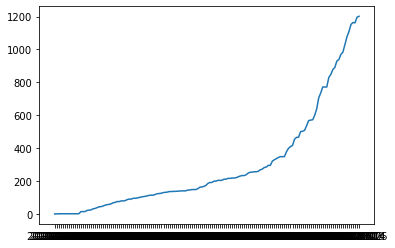

In [4]:
df_sc = df[(df['state'] == 'California') & (df['county'] == 'Santa Cruz')]

display(df_sc)
df_sc.set_index('date', inplace=True)

print(df_sc.shape)

# df_sc['cases'].plot()

cases = df_sc['cases']

cases2 = df_sc.filter(items=['cases'])
display(cases.head(10))
display(cases2.head(10))

# df_sc_train = df_sc[:120]

plt.plot(cases)

# df_sc_train['cases'].plot()

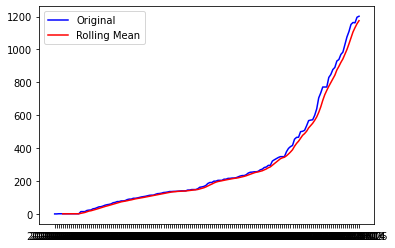

In [5]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = timeseries.rolling(5).mean()
    rolstd = timeseries.rolling(5).std()
    
    plt.plot(timeseries, color = 'blue', label = 'Original')
    plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
#     plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    
    plt.show()
    
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
#     for key, value in dftest[4].items():
#         dfoutput['Critical Value (%s)' %key] = value

#     print(dfoutput)

test_stationarity(cases)

In [6]:
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.stattools import acf, pacf

# # lag_acf = acf(cases, nlogs = 20)
# # lag_pacf = pacf(cases, nlag=20, method='ols')

# cases_diff = cases - cases.shift()
# cases_diff.dropna(inplace=True)
# plt.plot(cases_diff)

In [7]:
# # AR Model
# model = ARIMA(cases, order=(2, 1, 0))
# results_AR = model.fit(disp=-1)
# # plt.plot(cases)
# plt.plot(cases_diff)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - cases_diff)**2))

In [8]:
# predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)
# print(predictions_AR_diff.head())

# predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
# print(predictions_AR_diff_cumsum.head())

# predictions_AR = pd.Series(cases.iloc[0], index=cases.index)
# predictions_AR = predictions_AR.add(predictions_AR_diff_cumsum, fill_value=0)
# print(predictions_AR)

In [9]:
# plt.plot(cases)
# plt.plot(predictions_AR)

In [10]:

# times = pd.date_range('2020-08-06', periods=16)
# times


# Another Auto ARIMA

In [70]:
df_sc = df[(df['state'] == 'California') & (df['county'] == 'Santa Clara')]

display(df_sc)
df_sc.set_index('date', inplace=True)

,date,county,state,fips,cases,deaths
36,2020-01-31,Santa Clara,California,6085.0,1,0
42,2020-02-01,Santa Clara,California,6085.0,1,0
50,2020-02-02,Santa Clara,California,6085.0,2,0
58,2020-02-03,Santa Clara,California,6085.0,2,0
66,2020-02-04,Santa Clara,California,6085.0,2,0
...,...,...,...,...,...,...
389429,2020-08-01,Santa Clara,California,6085.0,10321,192
392646,2020-08-02,Santa Clara,California,6085.0,10626,192
395862,2020-08-03,Santa Clara,California,6085.0,10794,192
399079,2020-08-04,Santa Clara,California,6085.0,11030,193


In [71]:
import pmdarima as pm

def predict(df):

    cases = df.filter(items=['cases'])
    train_size = int(len(cases) * 0.9)
    test_size = len(cases) - train_size

    train, test = cases.iloc[0:train_size], cases.iloc[train_size:]

    model = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                         max_p=15, max_q=15, max_P=15, max_Q=15, seasonal=True, 
                         m=12, stepwise=True, supress_warning=True, D=1, d=1, max_d=1,
                         error_action='ignore', n_fits=25, random_state=20)

    preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True)
    predict_df = pd.DataFrame(preds, index=cases[-test.shape[0]:].index, columns=['yhat'])
    conf_df = pd.DataFrame(conf_int, index=cases[-test.shape[0]:].index, columns=['yhat_lower', 'yhat_upper'])

    df_test = pd.concat([df, predict_df, conf_df], axis=1)
    df_test['yhat'] = df_test['yhat'].round(2)
    df_test.rename(columns={'cases' : 'y'}, inplace=True)

    return df_test

df_test = predict(df_sc)

In [72]:
# display(df_test)

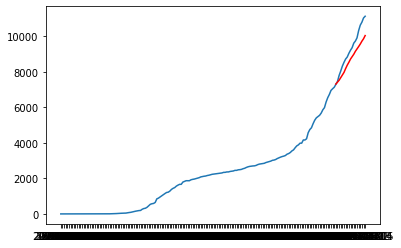

In [73]:
fig, ax1 = plt.subplots()
ax1.plot(df_test.y)
ax1.plot(df_test.yhat, color = 'red')

In [74]:
import pmdarima as pm

def predict_future(df, pred_item, pred_period):

    train = df.filter(items=[pred_item])
    pred_start = cases.index[-1]
    
#     print("Prediction from date: " + pred_start)
    
    pred_dates = pd.date_range(pred_start, periods=pred_period)
    
    pred_dates = [str(i) for i in pred_dates]
    

    model = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                         max_p=15, max_q=15, max_P=15, max_Q=15, seasonal=True, 
                         m=12, stepwise=True, supress_warning=True, D=1, d=1, max_d=1,
                         error_action='ignore', n_fits=25, random_state=20)

    preds, conf_int = model.predict(n_periods=pred_period, return_conf_int=True)
    predict_df = pd.DataFrame(preds, index=pred_dates, columns=['yhat'])
    conf_df = pd.DataFrame(conf_int, index=pred_dates, columns=['yhat_lower', 'yhat_upper'])

    df_test = pd.concat([df, predict_df, conf_df], axis=1)
    df_test['yhat'] = df_test['yhat'].round(2)
    df_test.rename(columns={'cases' : 'y'}, inplace=True)

    return pred_start, pred_dates[pred_period-1], df_test

curr_date, pred_date15, predict = predict_future(df_sc, 'cases', 16)


In [75]:
print(curr_date)
print(pred_date15)

# predict = predict.fillna(0)
display(predict[-17:])

2020-08-05
2020-08-20 00:00:00


,county,state,fips,y,deaths,yhat,yhat_lower,yhat_upper
2020-08-05,Santa Clara,California,6085.0,11128.0,197.0,NaN,NaN,NaN
2020-08-05 00:00:00,NaN,NaN,NaN,NaN,NaN,11265.24,11158.984737,11371.488162
2020-08-06 00:00:00,NaN,NaN,NaN,NaN,NaN,11391.58,11202.861947,11580.291774
2020-08-07 00:00:00,NaN,NaN,NaN,NaN,NaN,11506.45,11226.675538,11786.219063
2020-08-08 00:00:00,NaN,NaN,NaN,NaN,NaN,11611.84,11241.283016,11982.396704
2020-08-09 00:00:00,NaN,NaN,NaN,NaN,NaN,11747.58,11287.301261,12207.862778
2020-08-10 00:00:00,NaN,NaN,NaN,NaN,NaN,11840.32,11292.843943,12387.797856
2020-08-11 00:00:00,NaN,NaN,NaN,NaN,NaN,11938.93,11307.238496,12570.622554
2020-08-12 00:00:00,NaN,NaN,NaN,NaN,NaN,12131.00,11418.351313,12843.645169
2020-08-13 00:00:00,NaN,NaN,NaN,NaN,NaN,12276.44,11486.143980,13066.730716


In [76]:
print(predict.loc[curr_date]['y'])
print(predict.loc[pred_date15]['yhat'])

incre_rate = (predict.loc[pred_date15]['yhat'] - predict.loc[curr_date]['y']) / predict.loc[curr_date]['y']
print(incre_rate)

11128.0
13019.21
0.1699505751258087


In [77]:
# display(df_test)

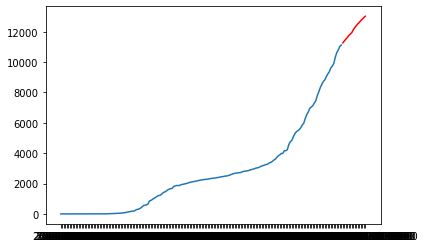

In [78]:
fig, ax1 = plt.subplots()
ax1.plot(predict.y)
ax1.plot(predict.yhat, color = 'red')

In [ ]:

# display(df)
state_list = df['state'].values

# print(state_list)

# increase_df = df.groupby(['county', 'state']).count()

# display(increase_df.drop(['date']))
# test = increase_df[['county', 'state']]
# display(test)
# increase_df[(increase_df['county'] == 'Snohomish')] = 0.5


# display(increase_df)
# print(state_list)

output = []
# for state in state_list:
for state in ['California']:    
    
    df_state = df[df['state'] == state]
#     display(df_state)
    print(state)
    county_list = df_state['county'].values
#     for county in county_list:
    for county in county_list:
        
        print(county)
#         df_county = df[(df['state'] == state) & (df['county'] == county)]
        df_county = df_state[df_state['county'] == county]
        df_county.set_index('date', inplace=True)
        
#         display(df_county)
        
        curr_date, pred_date15, predict = predict_future(df_county, 'cases', 16)
        
        incre_rate = (predict.loc[pred_date15]['yhat'] - predict.loc[curr_date]['y']) / predict.loc[curr_date]['y']
        
#         print(incre_rate)
        
        output.append([state, county, incre_rate])
#         increase_df[(increase_df['state'] == state) & (increase_df['county'] == county)] = incre_rate

increase_df = pd.DataFrame(np.array(output),
                   columns=['State', 'County', 'Increate Rate'])
display(increase_df)        
     

California
Orange


In [ ]:
# #MA Model
# model = ARIMA(cases, order=(0, 1, 2))
# results_MA = model.fit(disp=-1)
# # plt.plot(cases)
# plt.plot(cases_diff)
# plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - cases_diff)**2))

In [ ]:
# #ARIMA Model
# model = ARIMA(cases, order=(2, 1, 2))
# results_ARIMA = model.fit(disp=-1)
# # plt.plot(cases)
# plt.plot(cases_diff)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - cases_diff)**2))

In [ ]:
county_list = df['county'].values
print(county_list)
display(df)

In [ ]:
for county in county_list:
    df_county = df[df['county'] == county]
    lines = df_county.plot.line(x = 'date', y = 'cases')

    